In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

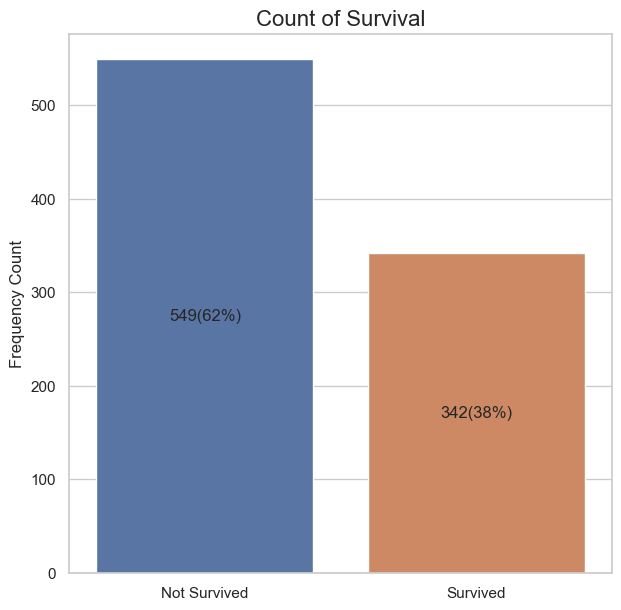

In [5]:
figure, survive_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Survived"].value_counts().index, y = train["Survived"].value_counts(), ax = survive_bar)
survive_bar.set_xticklabels(['Not Survived', 'Survived'])
survive_bar.set_ylabel('Frequency Count')
survive_bar.set_title('Count of Survival', fontsize = 16)

for patch in survive_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    survive_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Survived))+')',
               horizontalalignment='center', verticalalignment='center')


In [6]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

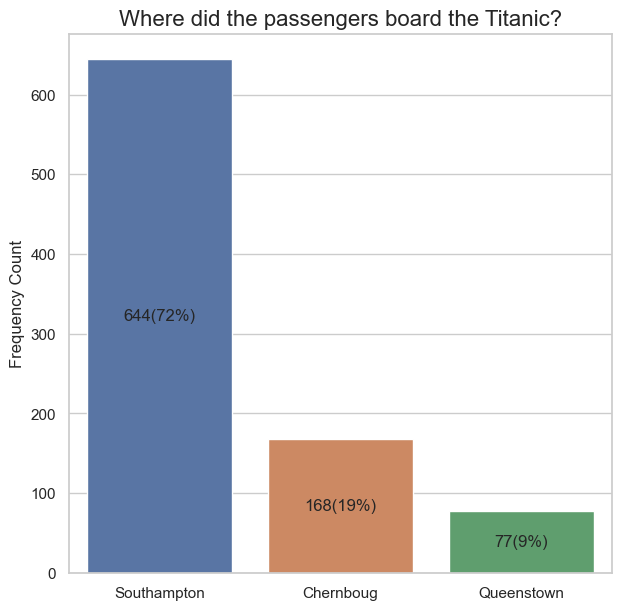

In [7]:
figure, embarked_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Embarked"].value_counts().index, y = train["Embarked"].value_counts(), ax = embarked_bar)
embarked_bar.set_xticklabels(['Southampton', 'Chernboug', 'Queenstown'])
embarked_bar.set_ylabel('Frequency Count')
embarked_bar.set_title('Where did the passengers board the Titanic?', fontsize = 16)
for patch in embarked_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    embarked_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Embarked))+')',
               horizontalalignment='center', verticalalignment='center')

In [8]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

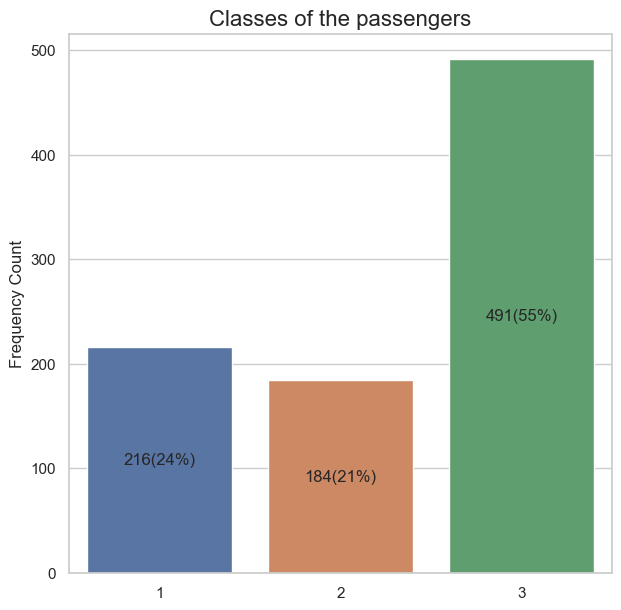

In [9]:
figure, Pclass_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Pclass"].value_counts().index, y = train["Pclass"].value_counts(), ax = Pclass_bar)
Pclass_bar.set_xticklabels(['1', '2', '3'])
Pclass_bar.set_ylabel('Frequency Count')
Pclass_bar.set_title('Classes of the passengers', fontsize = 16)
for patch in Pclass_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    Pclass_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Pclass))+')',
               horizontalalignment='center', verticalalignment='center')

In [10]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

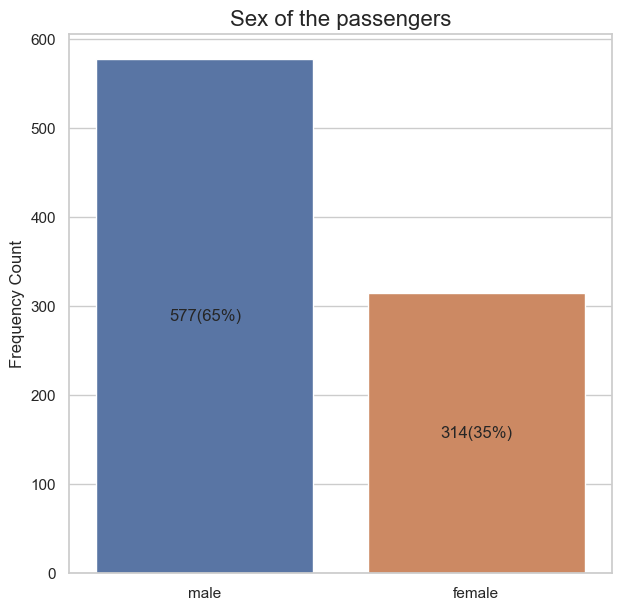

In [11]:
figure, Sex_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Sex"].value_counts().index, y = train["Sex"].value_counts(), ax = Sex_bar)
Sex_bar.set_xticklabels(['male', 'female'])
Sex_bar.set_ylabel('Frequency Count')
Sex_bar.set_title('Sex of the passengers', fontsize = 16)
for patch in Sex_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    Sex_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Sex))+')',
               horizontalalignment='center', verticalalignment='center')

In [12]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

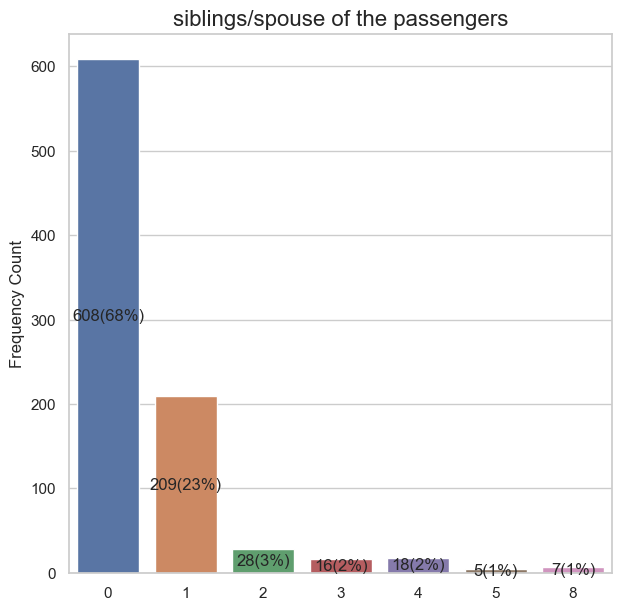

In [13]:
figure, SibSp_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["SibSp"].value_counts().index, y = train["SibSp"].value_counts(), ax = SibSp_bar)
SibSp_bar.set_xticklabels(['0', '1', '2', '3', '4', '5', '8'])
SibSp_bar.set_ylabel('Frequency Count')
SibSp_bar.set_title('siblings/spouse of the passengers', fontsize = 16)
for patch in SibSp_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    SibSp_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.SibSp))+')',
               horizontalalignment='center', verticalalignment='center')

In [14]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

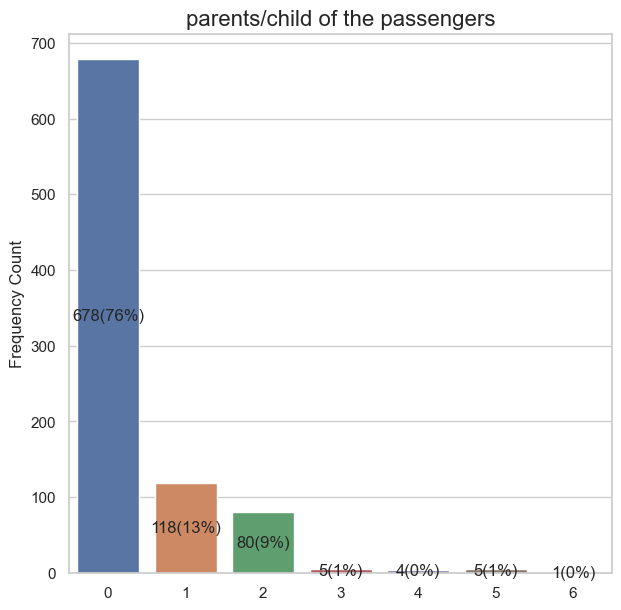

In [15]:
# you will change 9 times the name of features
figure, Parch_bar = plt.subplots(figsize=(7, 7))
sns.barplot(x= train["Parch"].value_counts().index, y = train["Parch"].value_counts(), ax = Parch_bar)
Parch_bar.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'])
Parch_bar.set_ylabel('Frequency Count')
Parch_bar.set_title('parents/child of the passengers', fontsize = 16)
for patch in Parch_bar.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    Parch_bar.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
               str(int(patch.get_height())) + '(' +
               '{:.0%}'.format(patch.get_height()/len(train.Parch))+')',
               horizontalalignment='center', verticalalignment='center')

In [16]:
train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [17]:
train.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [18]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [19]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
def print_percentage(df,col_name,col_values):
    for x in col_values:
        group = df.loc[df[col_name]==x]
        print ('{0} survival rate: {1:.3f}'.format(x, (group['Survived'].sum()/group.shape[0])))

In [21]:
print_percentage(train,'Sex',['male', 'female'])

male survival rate: 0.189
female survival rate: 0.742


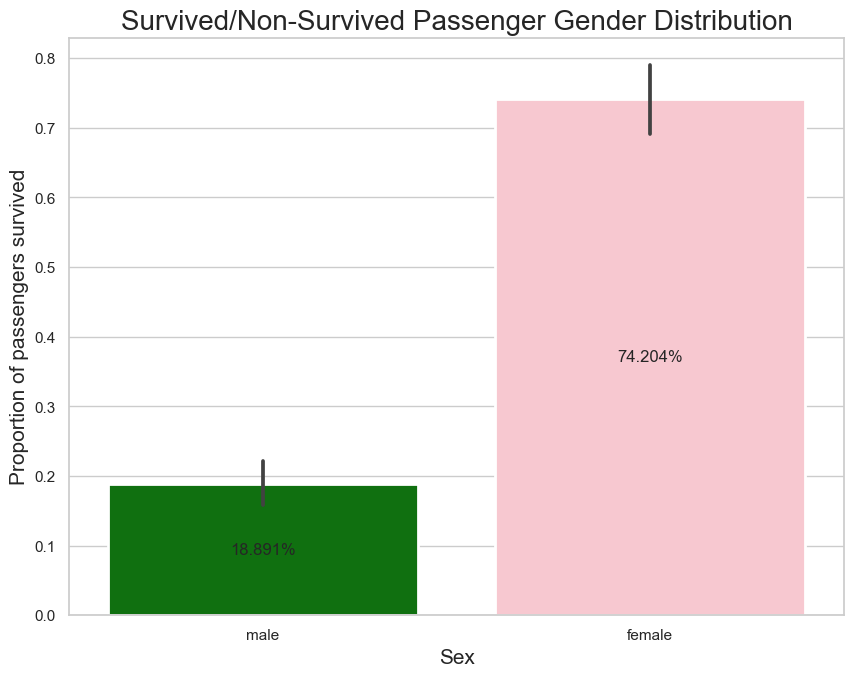

In [22]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))


sns.barplot(x = "Sex", 
            y = "Survived", 
            data=train, 
            ax = myaxis,
            estimator = np.mean,
            palette = {'male':"green", 'female':"Pink"},
            linewidth=2)
#islam_comment_i think estimator parameter has no importance in this case
myaxis.set_title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 20)
myaxis.set_xlabel("Sex",fontsize = 15)
myaxis.set_ylabel("Proportion of passengers survived", fontsize = 15)

for patch in myaxis.patches:
    label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
    label_y = patch.get_y() + patch.get_height()/2
    myaxis.text(label_x, label_y,
                #left - freq below - rel freq wrt population as a percentage
                '{:.3%}'.format(patch.get_height()),
               horizontalalignment='center', verticalalignment='center')


we shall plot the survival distribution within each gender

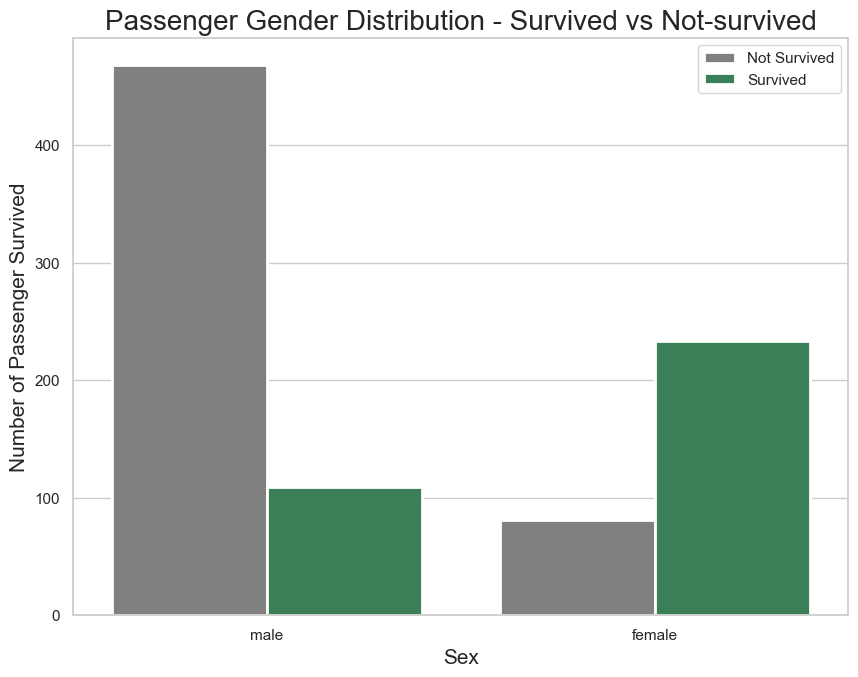

In [23]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Sex", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Gender Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Sex", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')


In [24]:
print_percentage(train,'Pclass',[1,2,3])

1 survival rate: 0.630
2 survival rate: 0.473
3 survival rate: 0.242


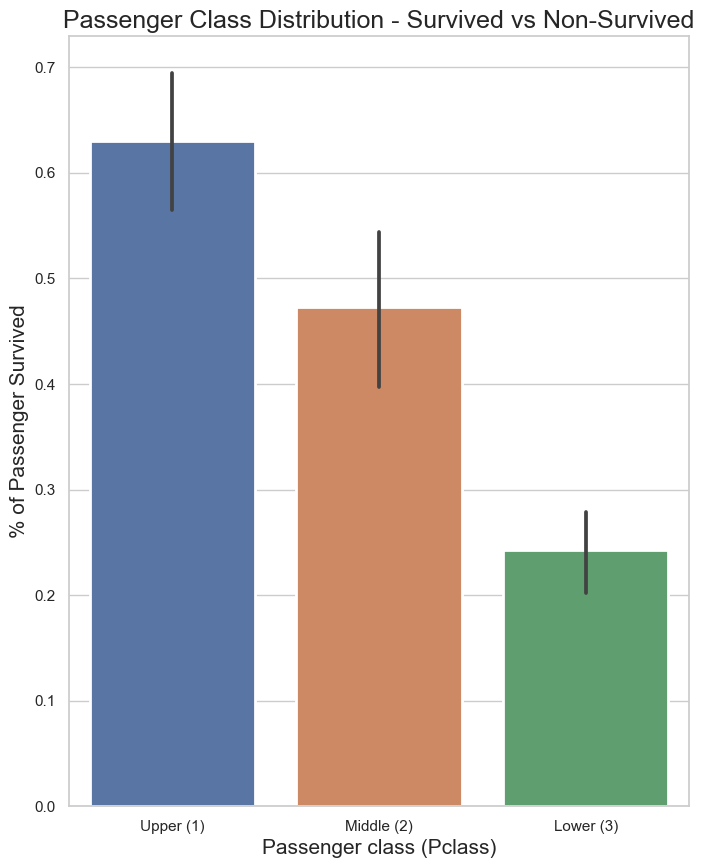

In [25]:
figure, pclass_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Pclass", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = pclass_bar,
            linewidth=2)
pclass_bar.set_title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 18)
pclass_bar.set_xlabel("Passenger class (Pclass)", fontsize = 15);
pclass_bar.set_ylabel("% of Passenger Survived", fontsize = 15);
labels = ['Upper (1)', 'Middle (2)', 'Lower (3)']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
pclass_bar.set_xticklabels(labels);

In [26]:
print_percentage(train,'Embarked',['S','C','Q'])

S survival rate: 0.337
C survival rate: 0.554
Q survival rate: 0.390


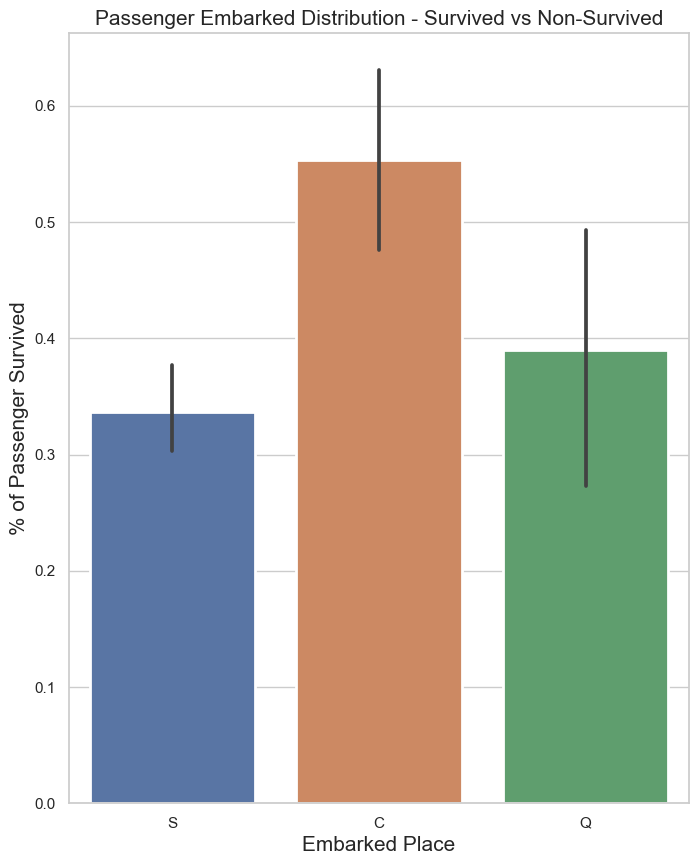

In [27]:
figure, embarked_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Embarked", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = embarked_bar,
            linewidth=2)
embarked_bar.set_title("Passenger Embarked Distribution - Survived vs Non-Survived", fontsize = 15)
embarked_bar.set_xlabel("Embarked Place", fontsize = 15);
embarked_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

In [28]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [29]:
print_percentage(train,'Parch',[0,1,2,3,4,5,6])

0 survival rate: 0.344
1 survival rate: 0.551
2 survival rate: 0.500
3 survival rate: 0.600
4 survival rate: 0.000
5 survival rate: 0.200
6 survival rate: 0.000


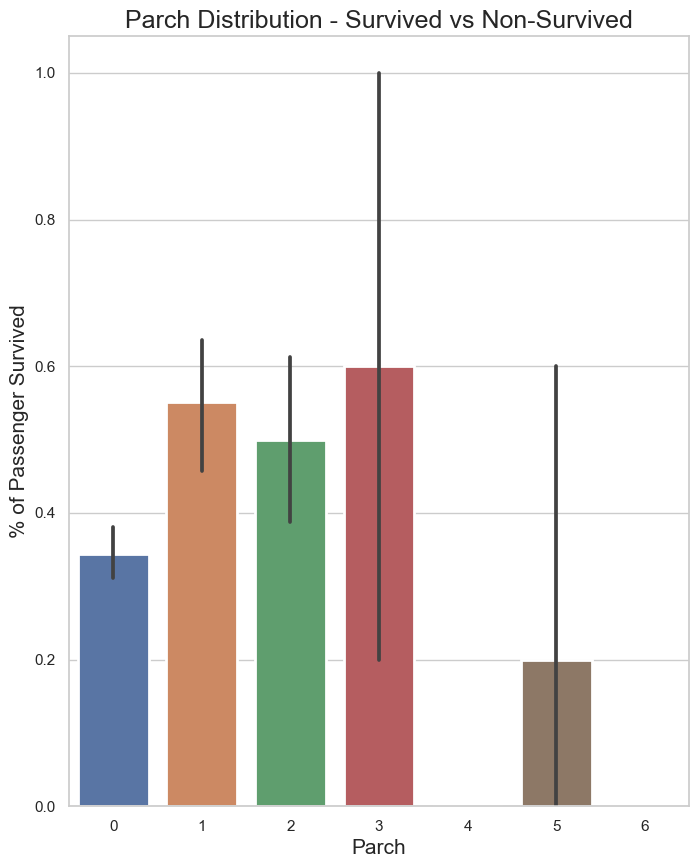

In [30]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "Parch", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Parch Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("Parch", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

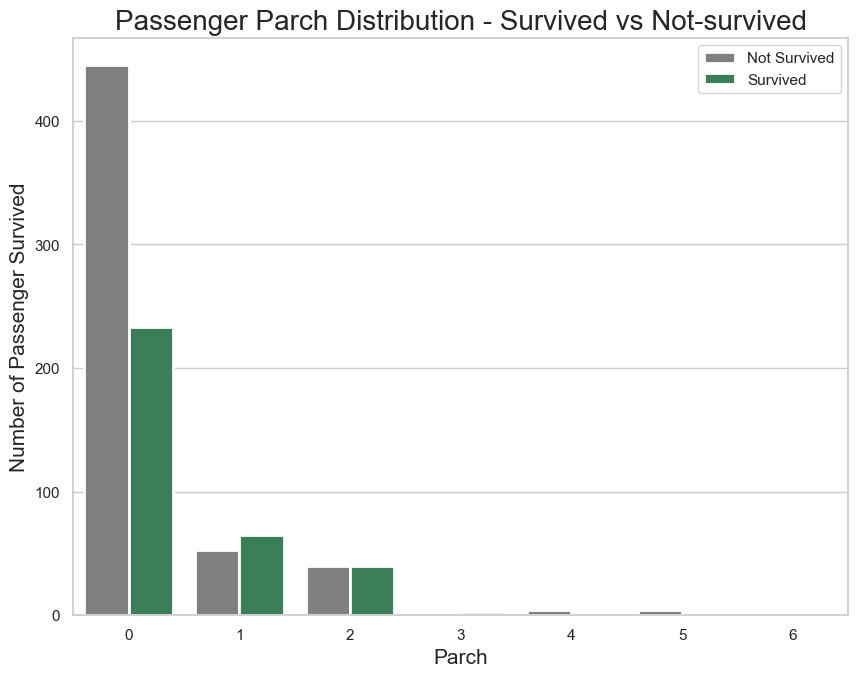

In [31]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "Parch", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Passenger Parch Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Parch", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

In [32]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [33]:
print_percentage(train,'SibSp',[0,1,2,3,4,5,8])

0 survival rate: 0.345
1 survival rate: 0.536
2 survival rate: 0.464
3 survival rate: 0.250
4 survival rate: 0.167
5 survival rate: 0.000
8 survival rate: 0.000


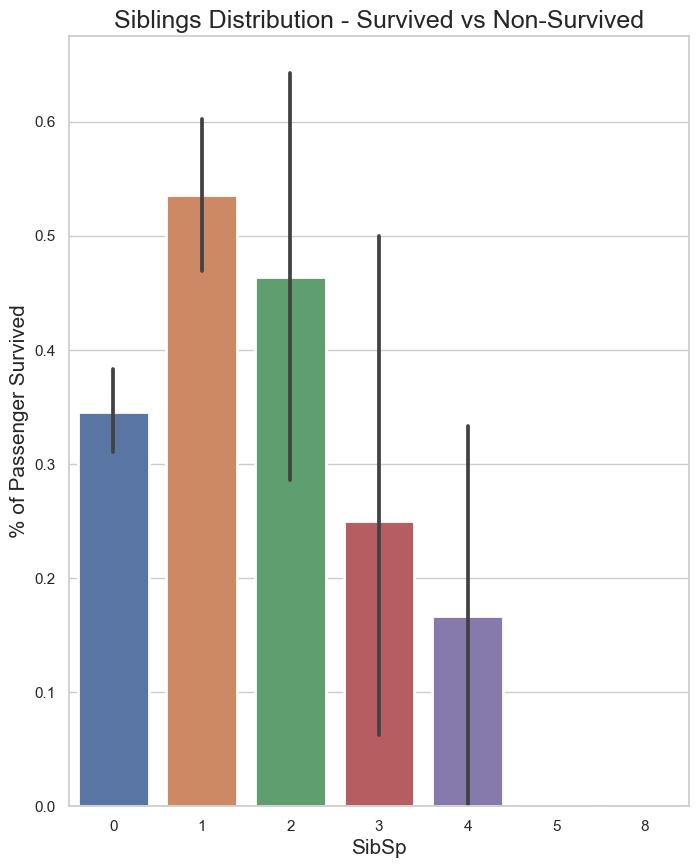

In [34]:
figure, parch_bar = plt.subplots(figsize = (8,10))
sns.barplot(x = "SibSp", 
            y = "Survived", 
            estimator = np.mean,
            data=train, 
            ax = parch_bar,
            linewidth=2)
parch_bar.set_title("Siblings Distribution - Survived vs Non-Survived", fontsize = 18)
parch_bar.set_xlabel("SibSp", fontsize = 15);
parch_bar.set_ylabel("% of Passenger Survived", fontsize = 15);

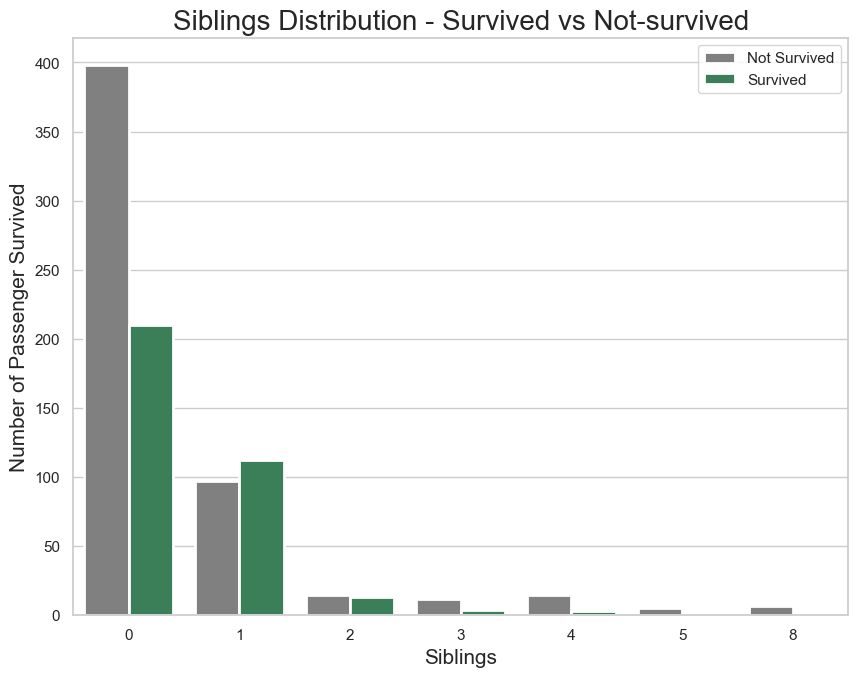

In [35]:
figure, myaxis = plt.subplots(figsize=(10, 7.5))

sns.countplot(x = "SibSp", 
                   hue="Survived",
                   data = train, 
                   linewidth=2, 
                   palette = {1:"seagreen", 0:"gray"}, ax = myaxis)


## Fixing title, xlabel and ylabel
myaxis.set_title("Siblings Distribution - Survived vs Not-survived", fontsize = 20)
myaxis.set_xlabel("Siblings", fontsize = 15);
myaxis.set_ylabel("Number of Passenger Survived", fontsize = 15)
myaxis.legend(["Not Survived", "Survived"], loc = 'upper right')

we will investigate the continous features like age and fare

first, known ages only

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\3678693902.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preimputation)


<Axes: xlabel='Age', ylabel='Density'>

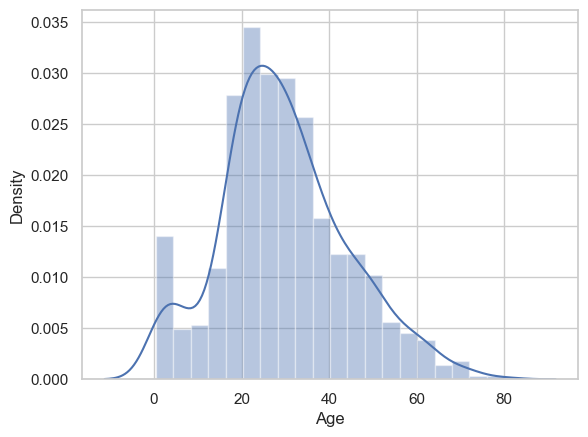

In [36]:
known_ages = pd.notnull(train.Age)
preimputation = train.Age[known_ages]
sns.distplot(preimputation)

whole age data plot

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\147352238.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Age"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)


<Axes: xlabel='Age', ylabel='Density'>

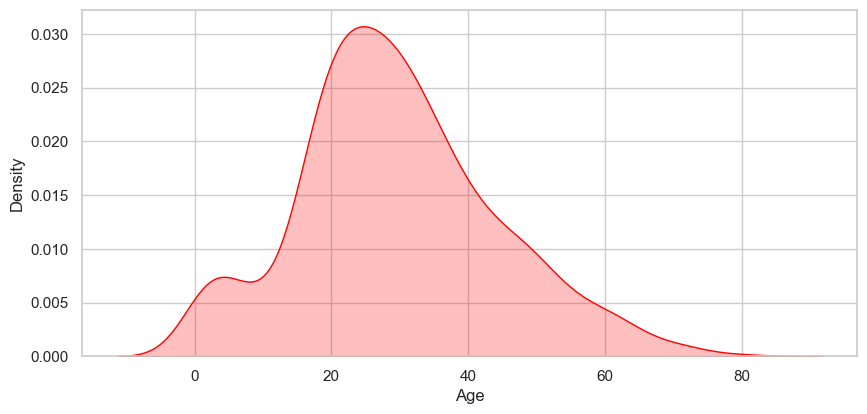

In [37]:
figure, myaxis = plt.subplots(figsize=(10, 4.5))
sns.kdeplot(data=train["Age"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\4040715594.py:3: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\4040715594.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\4040715594.py:6: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\4040715594.py:6: FutureWarning: 

`shade` is now deprecated in fav

Text(0.5, 1.0, 'Superimposed KDE plot for age of Survived and Not Survived')

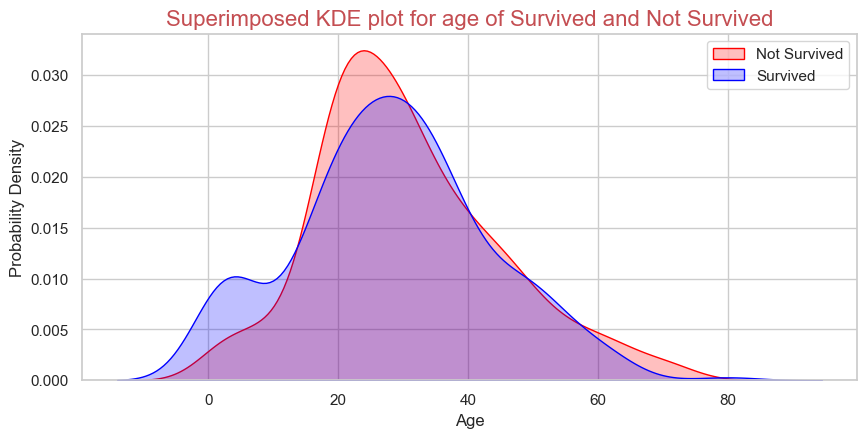

In [38]:
figure, myaxis = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train["Age"][(train["Survived"] == 0) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Red", shade=True, legend=True)

sns.kdeplot(data=train["Age"][(train["Survived"] == 1) & (
    train["Age"].notnull())], kernel='gau', ax=myaxis, color="Blue", shade=True, legend=True)

myaxis.set_xlabel("Age")
myaxis.set_ylabel("Probability Density")
myaxis.legend(["Not Survived", "Survived"], loc='upper right')
myaxis.set_title("Superimposed KDE plot for age of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

investigating fare distribution

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\1380426171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(preimputation)


<Axes: xlabel='Fare', ylabel='Density'>

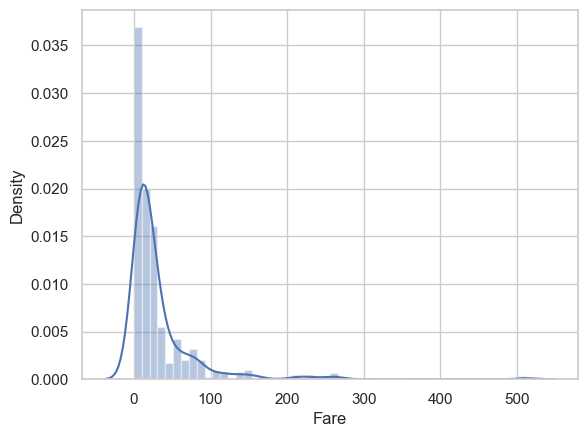

In [39]:
known_fare = pd.notnull(train.Fare)
preimputation = train.Fare[known_fare]
sns.distplot(preimputation)

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\2698176872.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train["Fare"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)


<Axes: xlabel='Fare', ylabel='Density'>

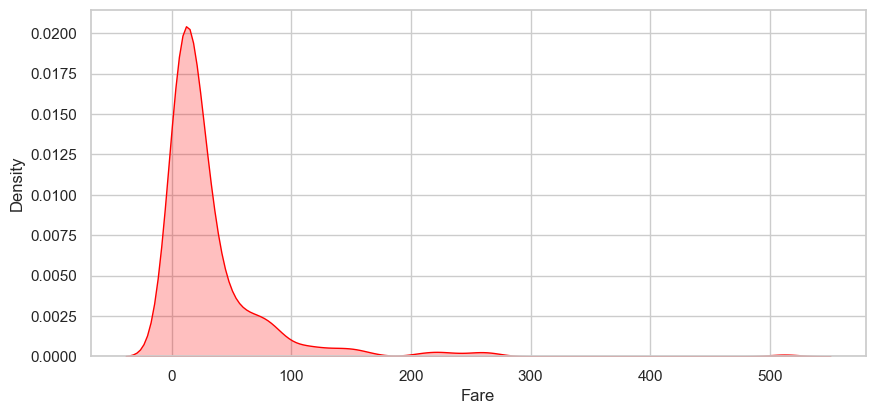

In [40]:
figure, myaxis = plt.subplots(figsize=(10, 4.5))
sns.kdeplot(data=train["Fare"], kernel='gau', ax=myaxis, color="Red", fill=True, legend=True)

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\858744694.py:3: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\858744694.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)
C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\858744694.py:5: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=train.loc[(train['Survived'] == 1),'Fare']

Text(0.5, 1.0, 'Superimposed KDE plot for Fare of Survived and Not Survived')

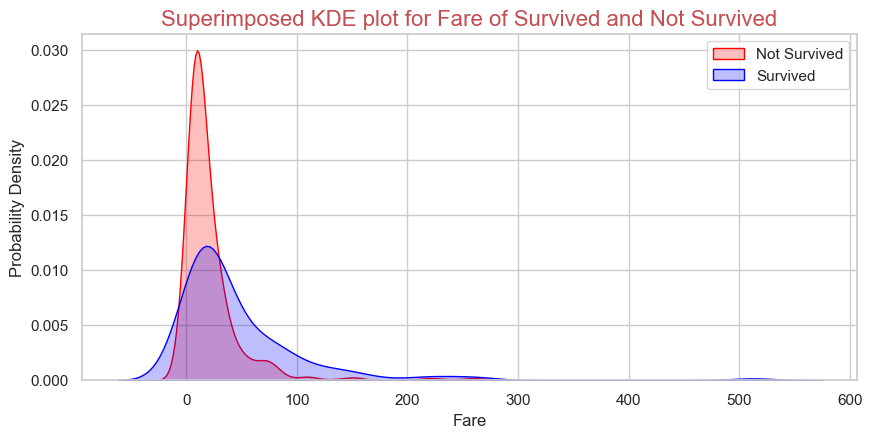

In [41]:
figure, fare = plt.subplots(figsize=(10, 4.5))

sns.kdeplot(data=train.loc[(train['Survived'] == 0),'Fare'], kernel='gau', ax=fare, color="Red", shade=True, legend=True)

sns.kdeplot(data=train.loc[(train['Survived'] == 1),'Fare'], kernel='gau', ax=fare, color="Blue", shade=True, legend=True)

fare.set_xlabel("Fare")
fare.set_ylabel("Probability Density")
fare.legend(["Not Survived", "Survived"], loc='upper right')
fare.set_title("Superimposed KDE plot for Fare of Survived and Not Survived",
                 loc='center', fontdict={'fontsize': 16}, color='r')

observing heatmap

C:\Users\islam mahrous\AppData\Local\Temp\ipykernel_2348\2591994919.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)


(7.0, 0.0)

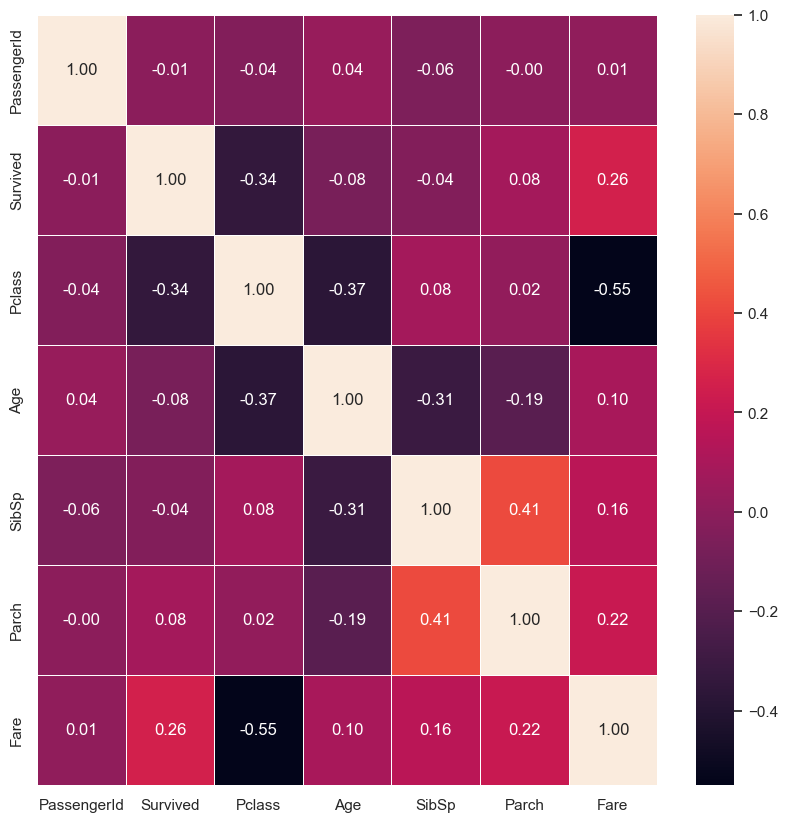

In [42]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(7, 0)

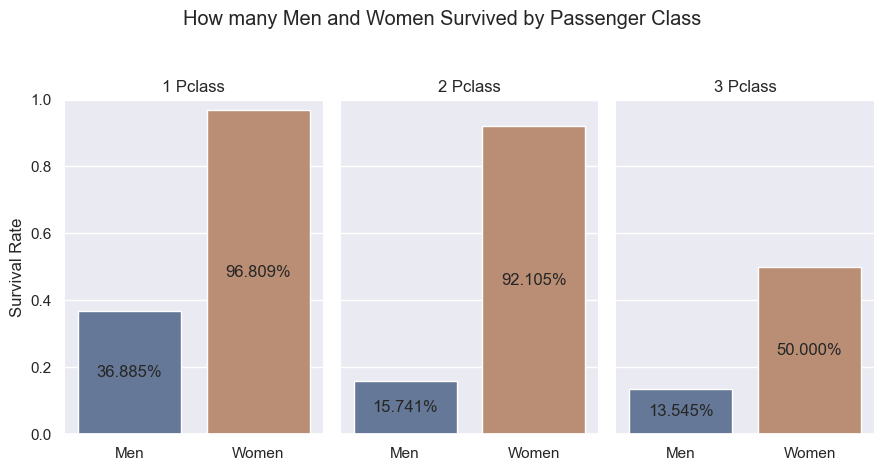

In [43]:
sns.set(font_scale=1)
g = sns.catplot(x="Sex", y="Survived", col="Pclass",
                    data=train, saturation=.5,
                    kind="bar", errorbar=None, aspect=.6)
(g.set_axis_labels("", "Survival Rate")
    .set_xticklabels(["Men", "Women"])
    .set_titles("{col_name} {col_var}")
    .set(ylim=(0, 1))
    .despine(left=True))  
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How many Men and Women Survived by Passenger Class');

for myaxis in g.axes[0]:
    for patch in myaxis.patches:
        label_x = patch.get_x() + patch.get_width()/2  # find midpoint of rectangle
        label_y = patch.get_y() + patch.get_height()/2
        myaxis.text(label_x, label_y,
                    #left - freq below - rel freq wrt population as a percentage
                    '{:.3%}'.format(patch.get_height()),
                   horizontalalignment='center', verticalalignment='center')


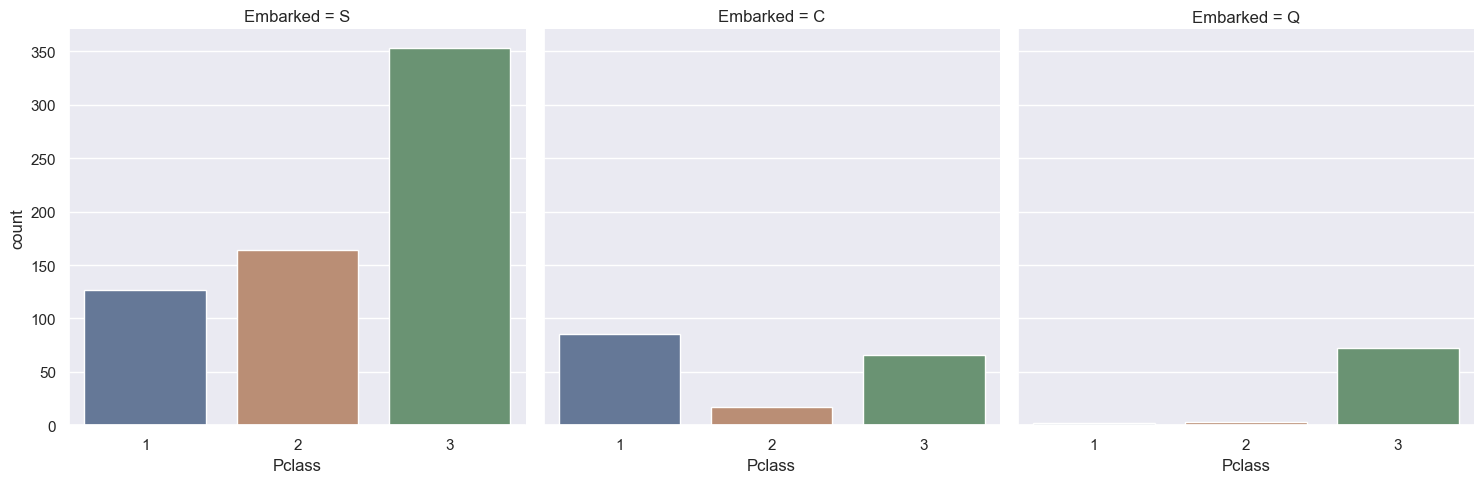

In [44]:
sns.set(font_scale=1)
g = sns.catplot(x="Pclass", col="Embarked",
                    data=train, saturation=.5,
                    kind="count", ci=None)

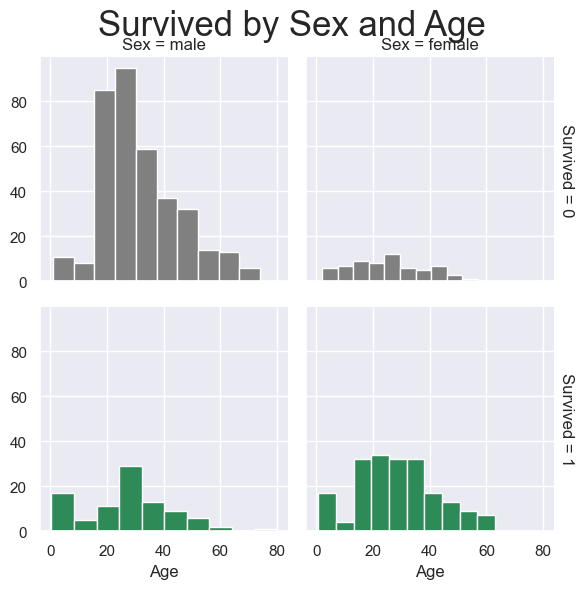

In [47]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor = 'white');
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)

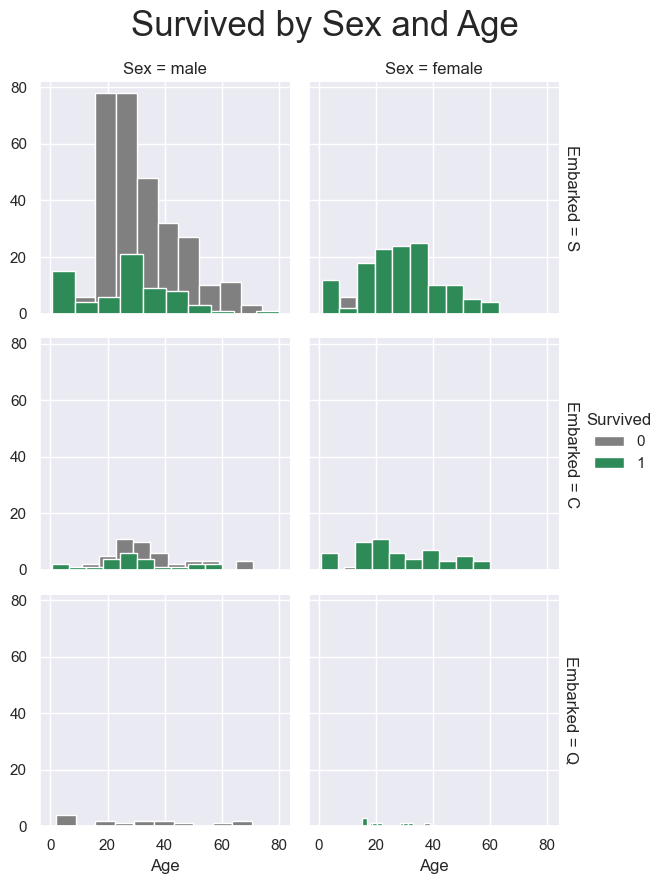

In [49]:
g = sns.FacetGrid(train, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",
                  palette = pal
                  )
g = g.map(plt.hist, "Age", edgecolor = 'white').add_legend();
g.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)